# PRODIGY_ML_03

Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.

### libraries

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score

import cv2
import joblib
from skimage.feature import hog

In [2]:
# to load and process images

def load_images(folder):
    images=[]
    labels=[]
    
    for label in ['cat','dog']:
        path = os.path.join(folder,label) #path
        for filename in os.listdir(path): # filename
            img_path = os.path.join(path,filename) # image_path
            img=cv2.imread(img_path) # image
            
            if img is not None:
                img=cv2.resize(img,(128,128)) # resize to larger
                img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # convert to greyscale
                
                hog_features=hog(img,pixels_per_cell=(8,8),cells_per_block=(2,2),feature_vector=True)
                images.append(hog_features)
                
                labels.append(0 if label=='cat' else 1)
            else:
                print(f"warnings: unable to load image.")
    return np.array(images),np.array(labels)

In [3]:
image_folder = r'C:\Users\KARTHIK\OneDrive\Desktop\RESUME\Dog and Cat'

In [4]:
images,labels = load_images(image_folder)

### Train/Test Split

In [5]:
x_train,x_test,y_train,y_test = train_test_split(images,labels,test_size=0.2,random_state=42)

### Modeling

In [6]:
parameters = {'kernel':('linear','rbf'),'C':[0.1,1,10]}

svc = svm.SVC()

In [7]:
model=GridSearchCV(svc,parameters)
model.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ('linear', 'rbf')})

In [8]:
y_pred = model.predict(x_test)

In [9]:
print("Best Accuracy:",model.best_params_)
print("Accuracy:",accuracy_score(y_test,y_pred))

Best Accuracy: {'C': 1, 'kernel': 'rbf'}
Accuracy: 0.74


In [10]:
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74        96
           1       0.77      0.72      0.74       104

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200



### Prediction

In [11]:
# save the model

model_path = 'svm_dog_cat_classifier_hog.pkl'
joblib.dump(model,model_path)

['svm_dog_cat_classifier_hog.pkl']

In [12]:
# load the model

model_path = 'svm_dog_cat_classifier_hog.pkl'
clf = joblib.load(model_path)

In [13]:
def predict_image(image_path,model):
    if not os.path.exists(image_path):
        return "Error: The File does not exists"
    
    img = cv2.imread(image_path)
    if img is None:
        return "Error: Unable to load image."
    
    try:
        img_resized = cv2.resize(img,(128,128))
        img_gray = cv2.cvtColor(img_resized,cv2.COLOR_BGR2GRAY)
        
        hog_features=hog(img_gray,pixels_per_cell=(8,8),cells_per_block=(2,2),feature_vector=True)
        hog_features=hog_features.reshape(1,-1)
        
        prediction=model.predict(hog_features)
        return "dog" if prediction==1 else"cat"
    except Exception as e:
        return f"Error while processing the image : {e}"

Enter the path of image to predict: C:\Users\KARTHIK\OneDrive\Desktop\RESUME\Dog and Cat\Verify.jpeg


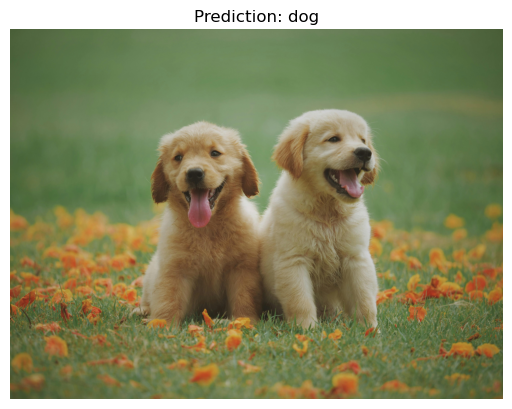

In [19]:
# input

image_path=input("Enter the path of image to predict: ")
prediction=predict_image(image_path,clf)

# Display
import matplotlib.pyplot as plt
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Prediction: {prediction}")
plt.axis('off')
plt.show()